In [1]:
!pip3 install pandas numpy seaborn matplotlib scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.2-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.4 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.16.3-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.7 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [seaborn]━━━ 4/5 [seaborn]earn]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar datos

In [76]:
df = pd.read_csv('data/chicago_crime_data.csv')
df.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,14027240,JJ487438,2025-11-13T00:00:00.000,005XX W ROSCOE ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,44.0,6.0,7,1171895.0,1922696.0,2025,2025-11-20T15:47:13.000,41.943335,-87.643600,"{'latitude': '41.943334801', 'longitude': '-87..."
1,14032816,JJ494286,2025-11-13T00:00:00.000,060XX S TALMAN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,16.0,66.0,7,1159744.0,1864469.0,2025,2025-11-20T15:47:13.000,41.783814,-87.689865,"{'latitude': '41.783813711', 'longitude': '-87..."
2,14028485,JJ489008,2025-11-13T00:00:00.000,061XX N SEELEY AVE,0760,BURGLARY,BURGLARY FROM MOTOR VEHICLE,VEHICLE NON-COMMERCIAL,False,False,...,40.0,2.0,6,1161552.0,1940595.0,2025,2025-11-20T15:47:13.000,41.992673,-87.681115,"{'latitude': '41.992672556', 'longitude': '-87..."
3,14028184,JJ488595,2025-11-13T00:00:00.000,014XX W 47TH ST,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,RESTAURANT,False,False,...,15.0,61.0,11,1167315.0,1873576.0,2025,2025-11-20T15:47:13.000,41.808646,-87.661846,"{'latitude': '41.808645557', 'longitude': '-87..."
4,14029403,JJ490135,2025-11-13T00:00:00.000,024XX S WASHTENAW AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,25.0,30.0,5,1158758.0,1887434.0,2025,2025-11-20T15:47:13.000,41.846853,-87.692853,"{'latitude': '41.846852738', 'longitude': '-87..."


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350000 entries, 0 to 349999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    350000 non-null  int64  
 1   case_number           350000 non-null  object 
 2   date                  350000 non-null  object 
 3   block                 350000 non-null  object 
 4   iucr                  350000 non-null  object 
 5   primary_type          350000 non-null  object 
 6   description           350000 non-null  object 
 7   location_description  342360 non-null  object 
 8   arrest                350000 non-null  bool   
 9   domestic              350000 non-null  bool   
 10  beat                  350000 non-null  int64  
 11  district              350000 non-null  int64  
 12  ward                  349994 non-null  float64
 13  community_area        349980 non-null  float64
 14  fbi_code              350000 non-null  int64  
 15  

# Proceso de analisis descriptivo

## Procesar datos

In [78]:
# Verificar datos duplicados
duplicates_1 = df.duplicated(keep=False).sum()
duplicates_2 = df.drop(columns=['id']).duplicated(keep=False).sum()
print(f"Number of duplicate rows: {duplicates_1}")
print(f"Number of duplicate rows (excluding ID column): {duplicates_2}")

Number of duplicate rows: 0
Number of duplicate rows (excluding ID column): 0


In [79]:
# Cambiar la representacion la columna fecha
df['date'] = pd.to_datetime(df['date'])
df['timestamp'] = df['date'].astype('int64') // 10**6
df['hour'] = pd.to_datetime(df['date']).dt.hour
df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()

## Representacion grafica

### Cantidad de delitos

/tmp/ipykernel_29399/556440575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='primary_type', order=df['primary_type'].value_counts().index, palette='magma')


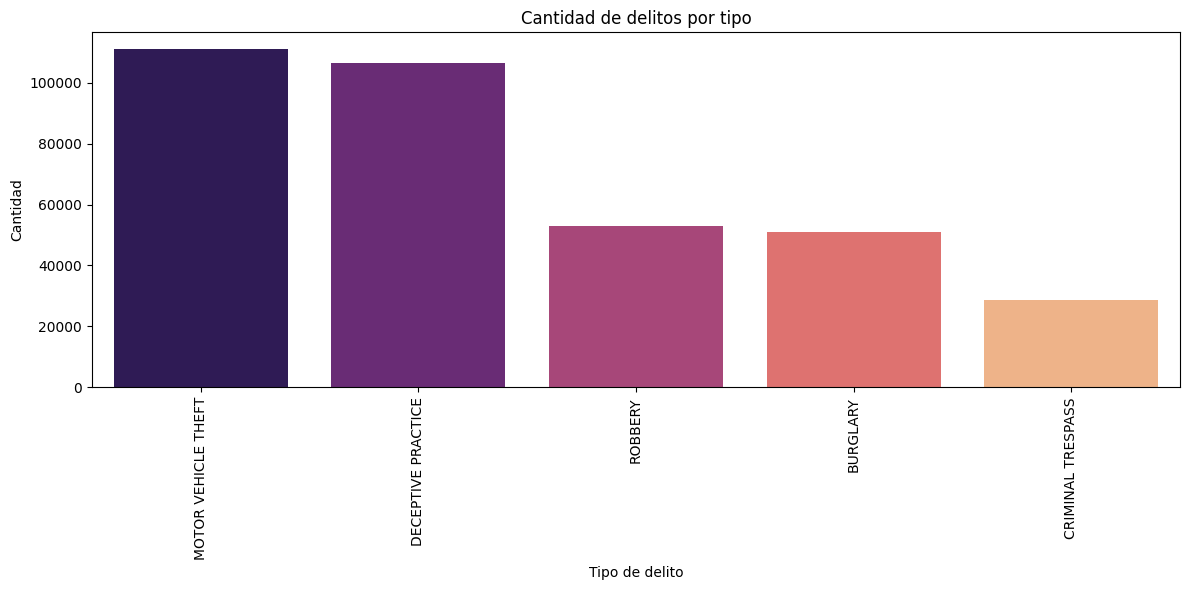

In [80]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='primary_type', order=df['primary_type'].value_counts().index, palette='magma')
plt.xticks(rotation=90)
plt.title('Cantidad de delitos por tipo')
plt.xlabel('Tipo de delito')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

### Delitos por año

/tmp/ipykernel_29399/3642492048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='magma')


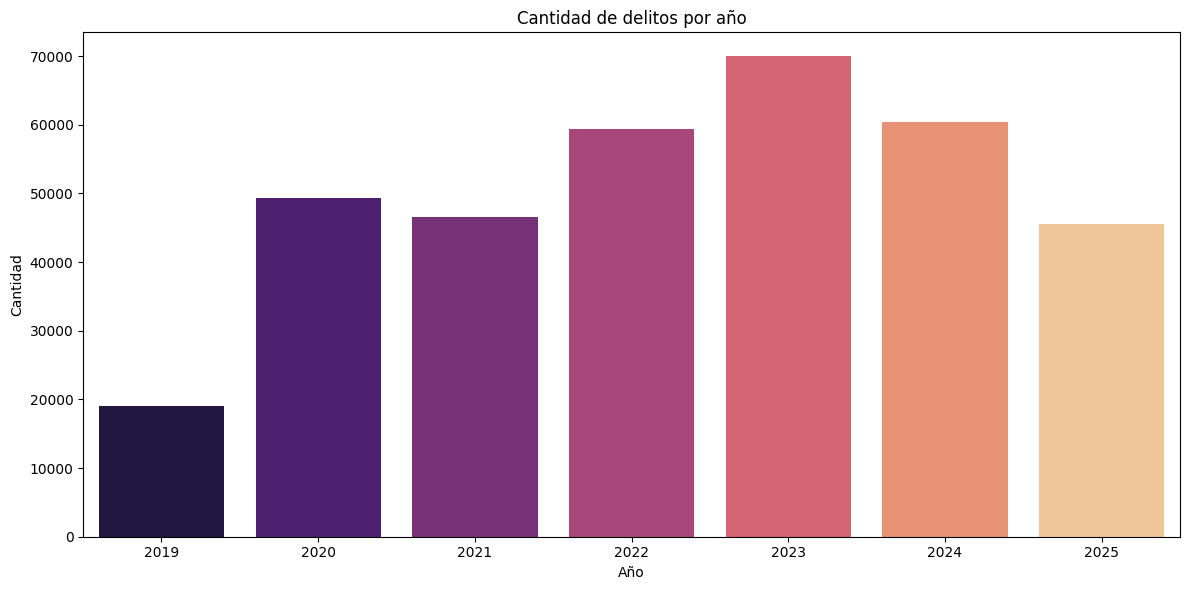

In [81]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', palette='magma')
plt.title('Cantidad de delitos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

### Proporcion por arrestos

/tmp/ipykernel_29399/4049484162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='arrest', palette='magma')


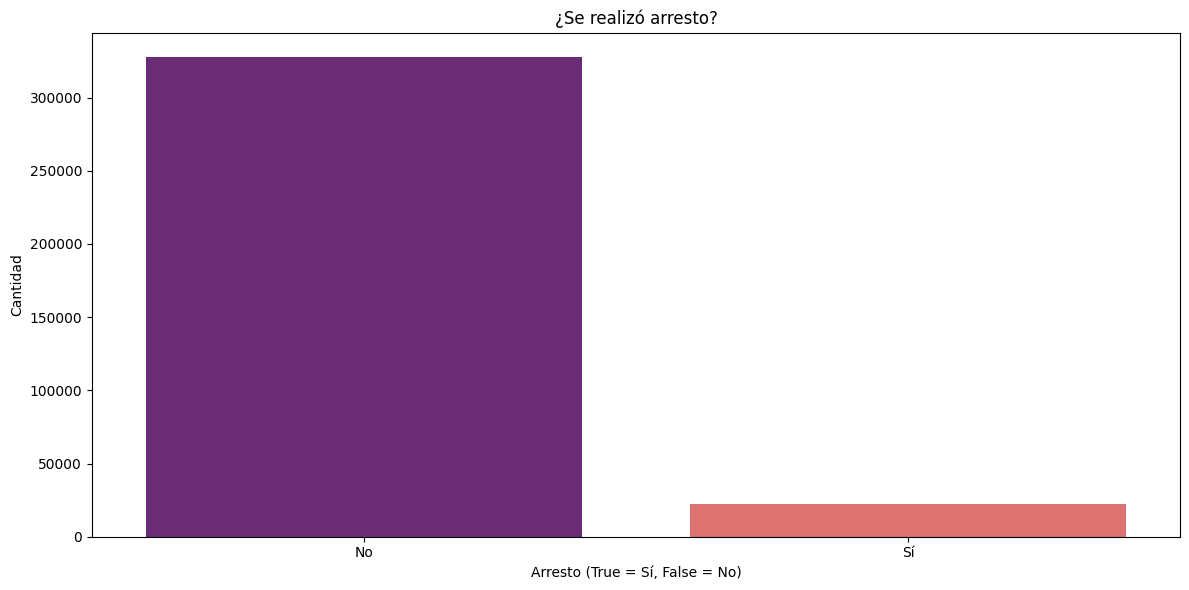

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='arrest', palette='magma')
plt.title('¿Se realizó arresto?')
plt.xlabel('Arresto (True = Sí, False = No)')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

### Delitos domésticos vs no domésticos

/tmp/ipykernel_29399/1282550028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='domestic', palette='magma')


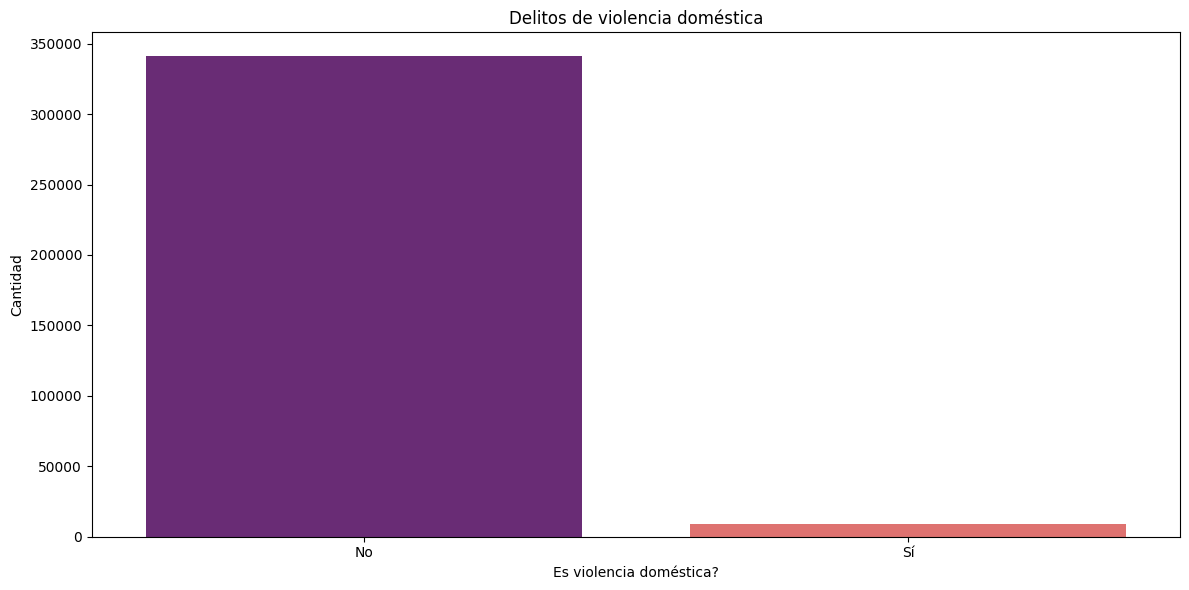

In [83]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='domestic', palette='magma')
plt.title('Delitos de violencia doméstica')
plt.xlabel('Es violencia doméstica?')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

### Top 10 ubicaciones más peligrosas

/tmp/ipykernel_29399/3189144578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='location_description', order=top_locations.index, palette='magma')


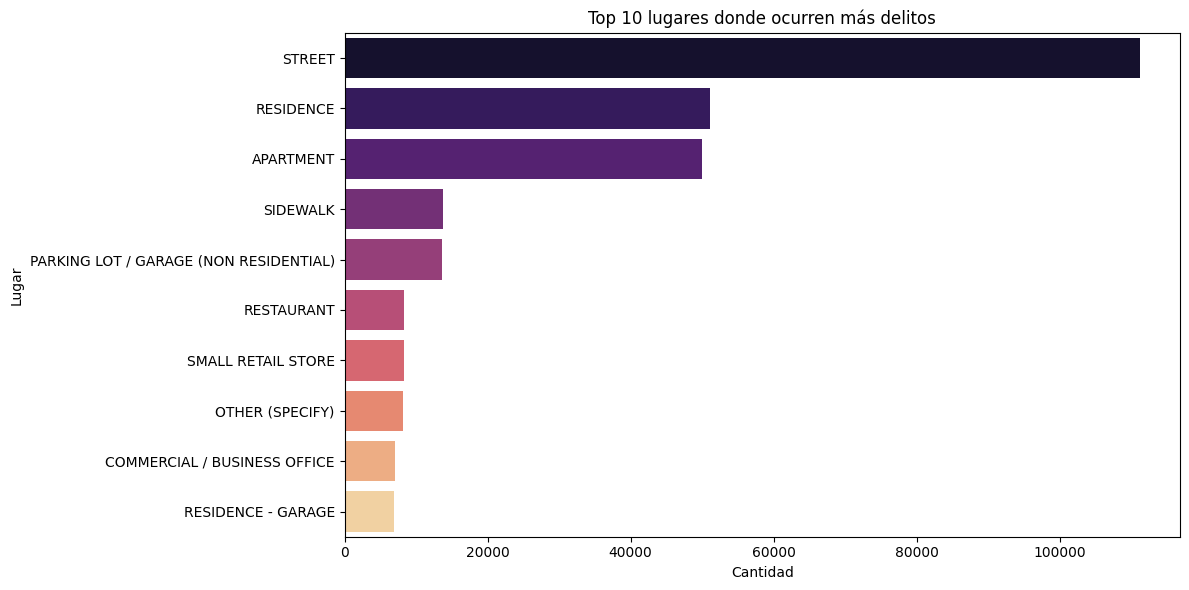

In [84]:
plt.figure(figsize=(12, 6))
top_locations = df['location_description'].value_counts().head(10)
sns.countplot(data=df, y='location_description', order=top_locations.index, palette='magma')
plt.title('Top 10 lugares donde ocurren más delitos')
plt.xlabel('Cantidad')
plt.ylabel('Lugar')
plt.tight_layout()
plt.show()

### Delitos por distrito (beat o district)

/tmp/ipykernel_29399/2020973835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='district', palette='magma')


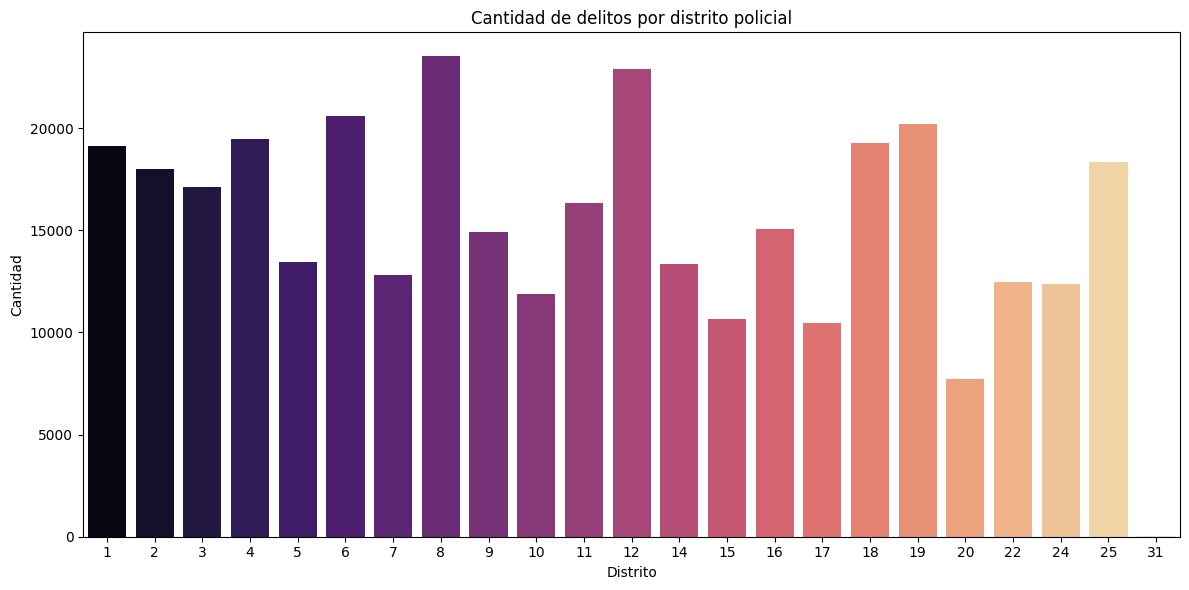

In [85]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='district', palette='magma')
plt.title('Cantidad de delitos por distrito policial')
plt.xlabel('Distrito')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

### Heatmap hora del día vs día de la semana

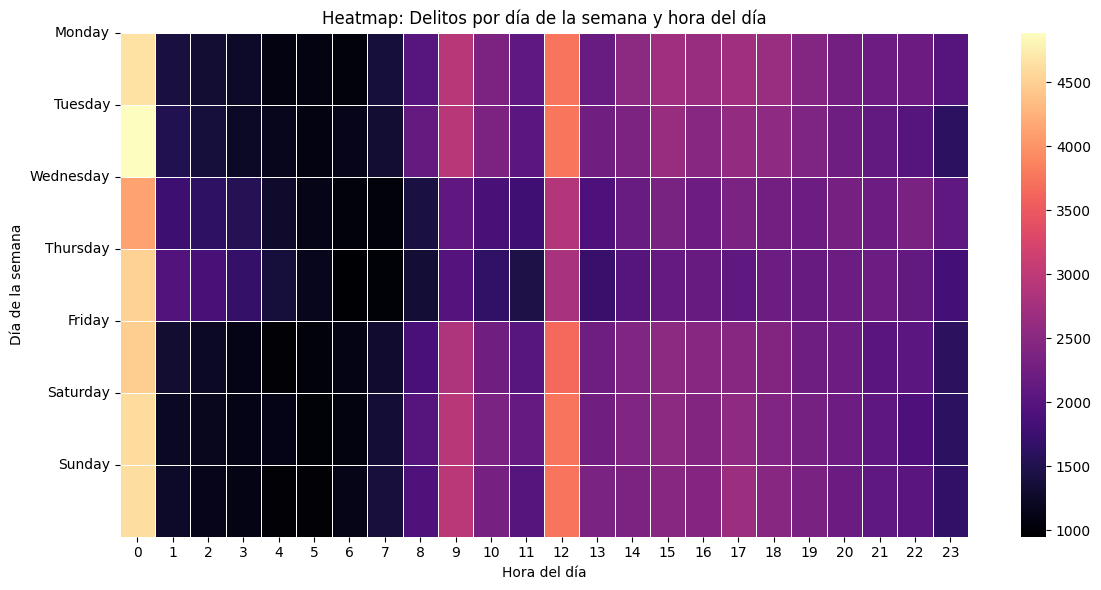

In [93]:
plt.figure(figsize=(12, 6))
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.heatmap(pd.crosstab(df['day_of_week'], df['hour']), cmap='magma', linewidths=.5)
plt.title('Heatmap: Delitos por día de la semana y hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Día de la semana')
plt.yticks(ticks=range(7), labels=order_days, rotation=0)
plt.tight_layout()
plt.show()

### Delitos por hora del día

/tmp/ipykernel_29399/3453705814.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hour', palette='magma')


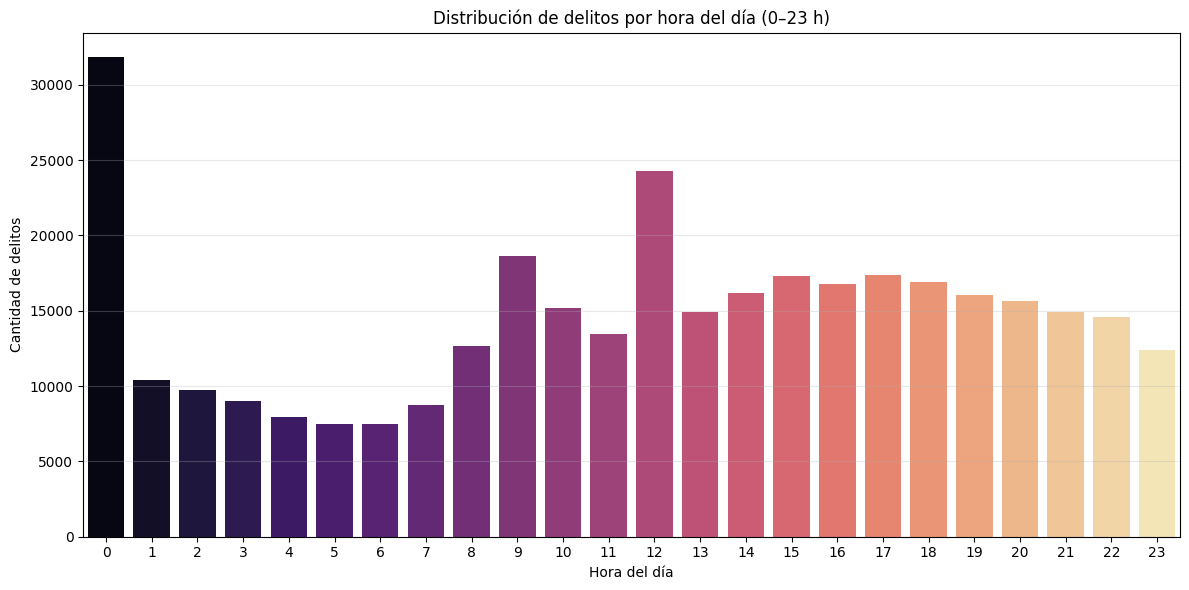

In [89]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour', palette='magma')
plt.title('Distribución de delitos por hora del día (0–23 h)')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de delitos')
plt.xticks(range(24))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Delitos por tipo y si hubo arresto

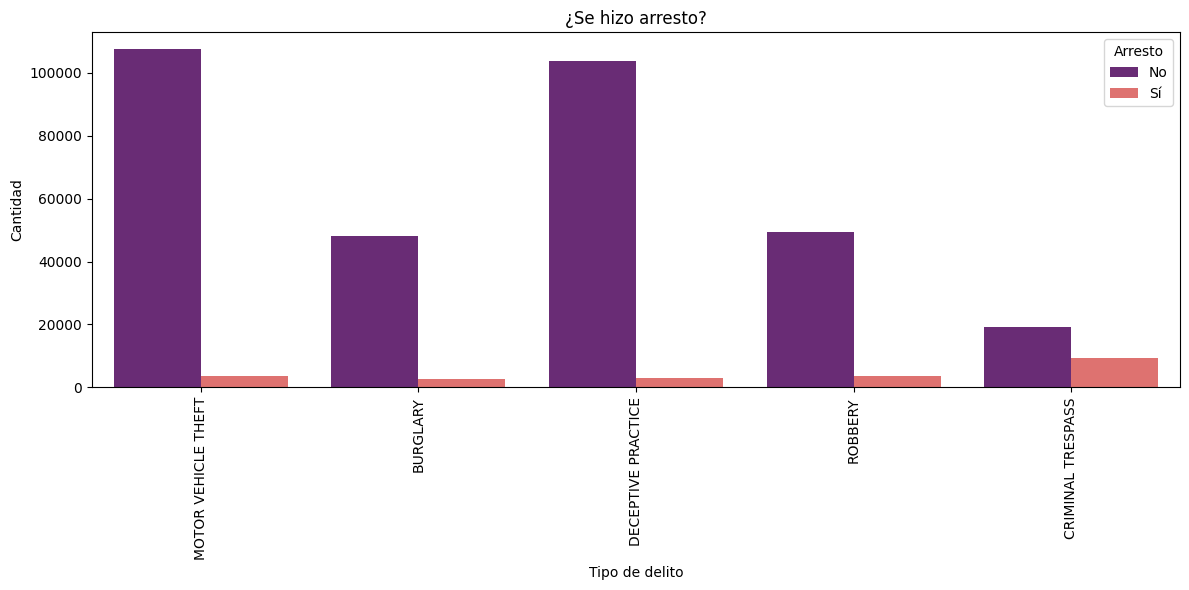

In [110]:
plt.figure(figsize=(12, 6))
top10_types = df['primary_type'].value_counts().index
sns.countplot(data=df[df['primary_type'].isin(top10_types)], 
              x='primary_type', hue='arrest', palette='magma')
plt.xticks(rotation=90)
plt.title('¿Se hizo arresto?')
plt.xlabel('Tipo de delito')
plt.ylabel('Cantidad')
plt.legend(title='Arresto', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

### Evolución anual de los delitos

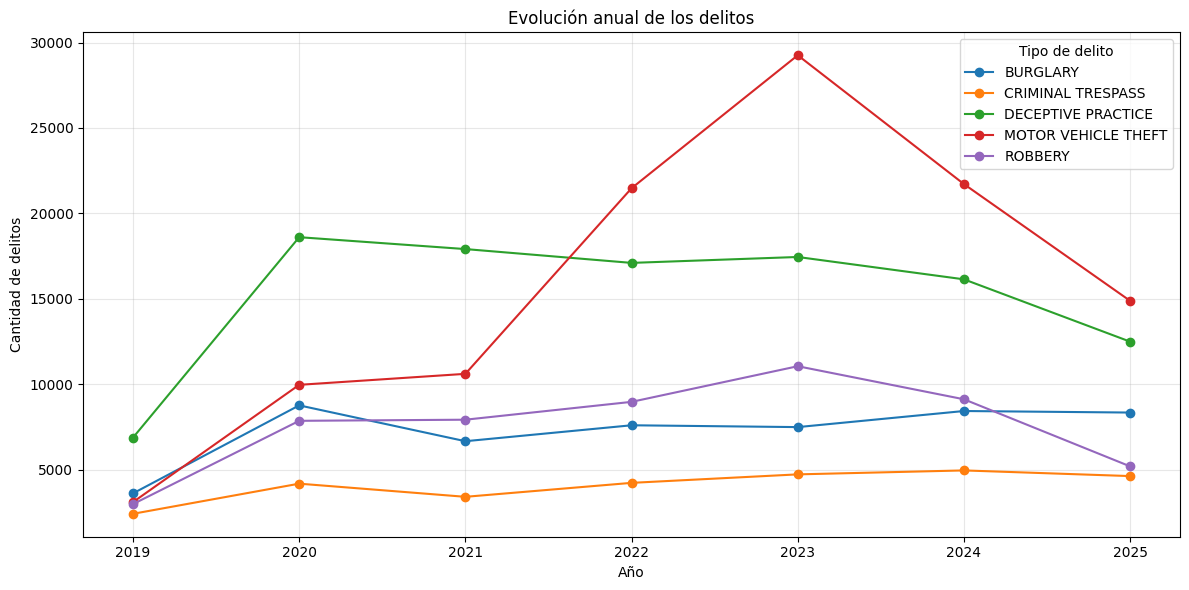

In [109]:
top5 = df['primary_type'].value_counts().index
temp = df[df['primary_type'].isin(top5)].groupby(['year', 'primary_type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
for col in temp.columns:
    plt.plot(temp.index, temp[col], marker='o', label=col)
plt.title('Evolución anual de los delitos')
plt.xlabel('Año')
plt.ylabel('Cantidad de delitos')
plt.legend(title='Tipo de delito')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Tasa de resolución (arresto) por distrito policial

/tmp/ipykernel_29399/1262614283.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_arresto.index, y=tasa_arresto.values, palette='magma')


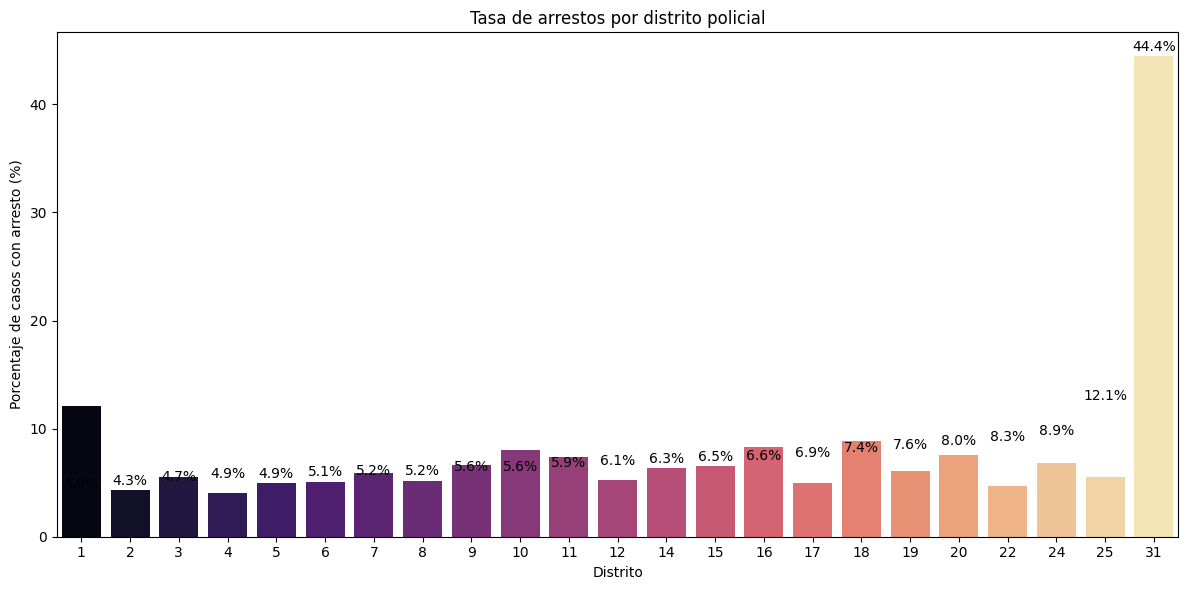

In [112]:
tasa_arresto = df.groupby('district')['arrest'].mean().mul(100).sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=tasa_arresto.index, y=tasa_arresto.values, palette='magma')
plt.title('Tasa de arrestos por distrito policial')
plt.xlabel('Distrito')
plt.ylabel('Porcentaje de casos con arresto (%)')
for i, v in enumerate(tasa_arresto.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')
plt.tight_layout()
plt.show()